

# Project: Investigate a Dataset - [Salary_Data_Based_country_and_race]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
The dataset consists of a comprehensive collection of salary and demographic information with additional details on years of experience. It offers a valuable resource for studying the relationship between income and various socio-demographic factors. The demographic attributes include age, gender, education, country, and race, providing a diverse range of variables for analysis. Researchers can explore patterns and trends in income distribution across different demographic categories, allowing for insights into potential disparities or variations in earning potential. Moreover, the dataset incorporates the crucial dimension of years of experience, enabling investigations into the impact of professional tenure on salary levels. This aspect adds a dynamic aspect to the analysis, enabling researchers to examine how income varies based on both demographic characteristics and accumulated work experience. The dataset presents a rich opportunity for conducting comprehensive studies on income diversity and understanding the multifaceted factors influencing earning potential in today's workforce.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', 100)

<a id='wrangling'></a>
## Data Wrangling

In [2]:
df = pd.read_csv("Salary_Data_Based_country_and_race.csv")

df.head(7)

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
5,5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0,USA,Hispanic
6,6,42.0,Female,Master's,Product Manager,12.0,120000.0,USA,Asian


In [3]:
df.shape

(6704, 9)

In [4]:
df.describe().round()

,Unnamed: 0,Age,Years of Experience,Salary
count,6704.0,6702.0,6701.0,6699.0
mean,3352.0,34.0,8.0,115327.0
std,1935.0,8.0,6.0,52786.0
min,0.0,21.0,0.0,350.0
25%,1676.0,28.0,3.0,70000.0
50%,3352.0,32.0,7.0,115000.0
75%,5027.0,38.0,12.0,160000.0
max,6703.0,62.0,34.0,250000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6704 non-null   int64  
 1   Age                  6702 non-null   float64
 2   Gender               6702 non-null   object 
 3   Education Level      6701 non-null   object 
 4   Job Title            6702 non-null   object 
 5   Years of Experience  6701 non-null   float64
 6   Salary               6699 non-null   float64
 7   Country              6704 non-null   object 
 8   Race                 6704 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 471.5+ KB



### Data Cleaning

In [6]:
df.isnull().sum()

Unnamed: 0             0
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

Unnamed: 0             0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.drop(columns = ["Unnamed: 0"], inplace = True, axis = 0)

In [11]:

df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary', 'Country', 'Race'],
      dtype='object')

In [12]:
df["Age"] = df["Age"].astype(int)

In [13]:
df["Years of Experience"] = df["Years of Experience"].astype(int)

In [14]:
df["Salary"] = df["Salary"].astype(int)

In [15]:
df.head(2)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32,Male,Bachelor's,Software Engineer,5,90000,UK,White
1,28,Female,Master's,Data Analyst,3,65000,USA,Hispanic


In [16]:
df.columns = df.columns.str.replace(" ","_")

df.head(2)

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary,Country,Race
0,32,Male,Bachelor's,Software Engineer,5,90000,UK,White
1,28,Female,Master's,Data Analyst,3,65000,USA,Hispanic


<a id='eda'></a>
## Exploratory Data Analysis

In [17]:
df.head(5)

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary,Country,Race
0,32,Male,Bachelor's,Software Engineer,5,90000,UK,White
1,28,Female,Master's,Data Analyst,3,65000,USA,Hispanic
2,45,Male,PhD,Senior Manager,15,150000,Canada,White
3,36,Female,Bachelor's,Sales Associate,7,60000,USA,Hispanic
4,52,Male,Master's,Director,20,200000,USA,Asian


# Create a filter for each race to use if needed:
hispanic_filt = df[df["Race"] == "Hispanic"]
asian_filt = df[df["Race"] == "Asian"]
kor_filt = df[df["Race"] == "Korean"]
chn_filt = df[df["Race"] == "Chinese"]
aus_filt = df[df["Race"] == "Australian"]
wel_filt = df[df["Race"] == "Welsh"]
afrimirca_filt = df[df["Race"] == "African American"]
mixed_filt = df[df["Race"] == "Mixed"]
black_filt = df[df["Race"] == "Black"]

In [18]:
%whos

Variable   Type         Data/Info
---------------------------------
df         DataFrame          Age  Gender    Educ<...>\n[6698 rows x 8 columns]
np         module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd         module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt        module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>


### Research Question 1 (What is the total and the averge salary for each race?)

In [19]:
df.columns

Index(['Age', 'Gender', 'Education_Level', 'Job_Title', 'Years_of_Experience',
       'Salary', 'Country', 'Race'],
      dtype='object')

In [20]:
sal_tmp = df.groupby(["Race"])
sal_agg = sal_tmp["Salary"].agg(["mean","sum"]).reset_index()


In [21]:
sal_agg

,Race,mean,sum
0,African American,112209.658192,39722219
1,Asian,115302.068621,184829216
2,Australian,114236.676991,51634978
3,Black,118601.212815,51828730
4,Chinese,111139.315315,49345856
5,Hispanic,110410.139752,35552065
6,Korean,117099.757112,53514589
7,Mixed,116330.859281,38854507
8,Welsh,112560.645646,37482695
9,White,117079.756371,229710482


Text(0, 0.5, 'Salaries')

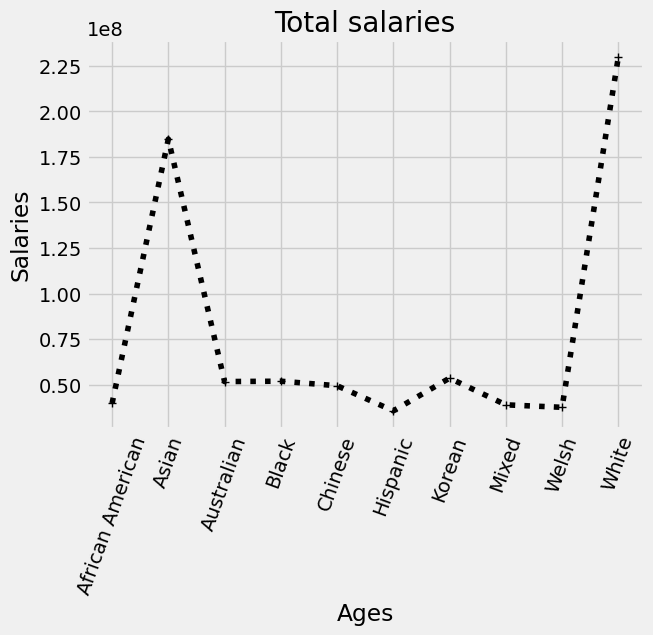

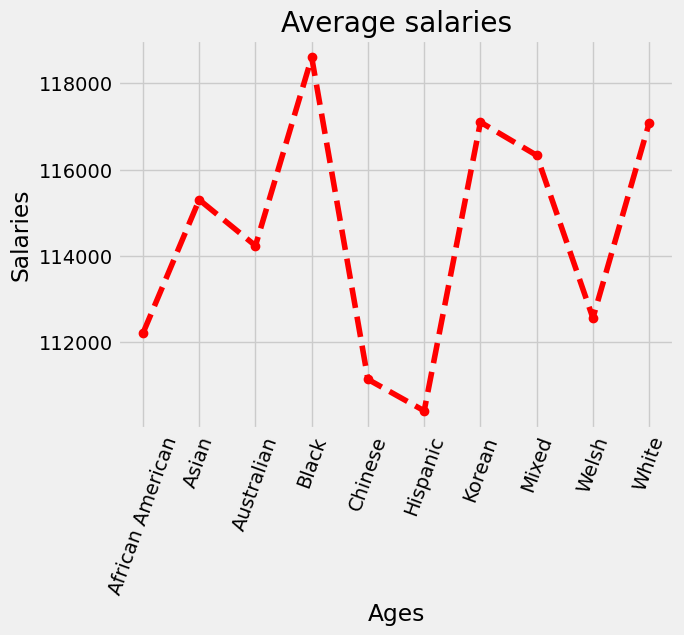

In [22]:
fig, (ax1) = plt.subplots()
plt.xticks(rotation = 70);

fig, (ax2) = plt.subplots()

ax1.plot(sal_agg["Race"],sal_agg["sum"], label = "All Develops", color = "k" , linestyle = ":", marker = "+")

ax2.plot(sal_agg["Race"],sal_agg["mean"], label = "Python Develops", color = "r" , linestyle = "--", marker = "o")


#ax1.legend("Total salaries")
ax1.set_title("Total salaries")
ax1.set_xlabel("Ages")
ax1.set_ylabel("Salaries")



#ax2.legend()
plt.xticks(rotation = 70);
ax2.set_title("Average salaries")
ax2.set_xlabel("Ages")
ax2.set_ylabel("Salaries")

### Research Question 2  (What is the total and the averge salary for each race based on Country?)

In [23]:
df.columns

Index(['Age', 'Gender', 'Education_Level', 'Job_Title', 'Years_of_Experience',
       'Salary', 'Country', 'Race'],
      dtype='object')

In [24]:
df["Country"].value_counts()

USA          1359
China        1343
Australia    1336
UK           1335
Canada       1325
Name: Country, dtype: int64

In [25]:
count_tmp = df.groupby(["Country","Race"])
count_agg = count_tmp["Salary"].agg(["mean","sum"]).reset_index()

In [26]:
count_agg

,Country,Race,mean,sum
0,Australia,Asian,114408.016807,54458216
1,Australia,Australian,114236.676991,51634978
2,Australia,White,116265.757353,47436429
3,Canada,Asian,115159.859341,52397736
4,Canada,Black,118601.212815,51828730
5,Canada,White,115961.212471,50211205
6,China,Chinese,111139.315315,49345856
7,China,Korean,117099.757112,53514589
8,China,White,120570.158371,53292010
9,UK,Asian,118621.178571,39856716


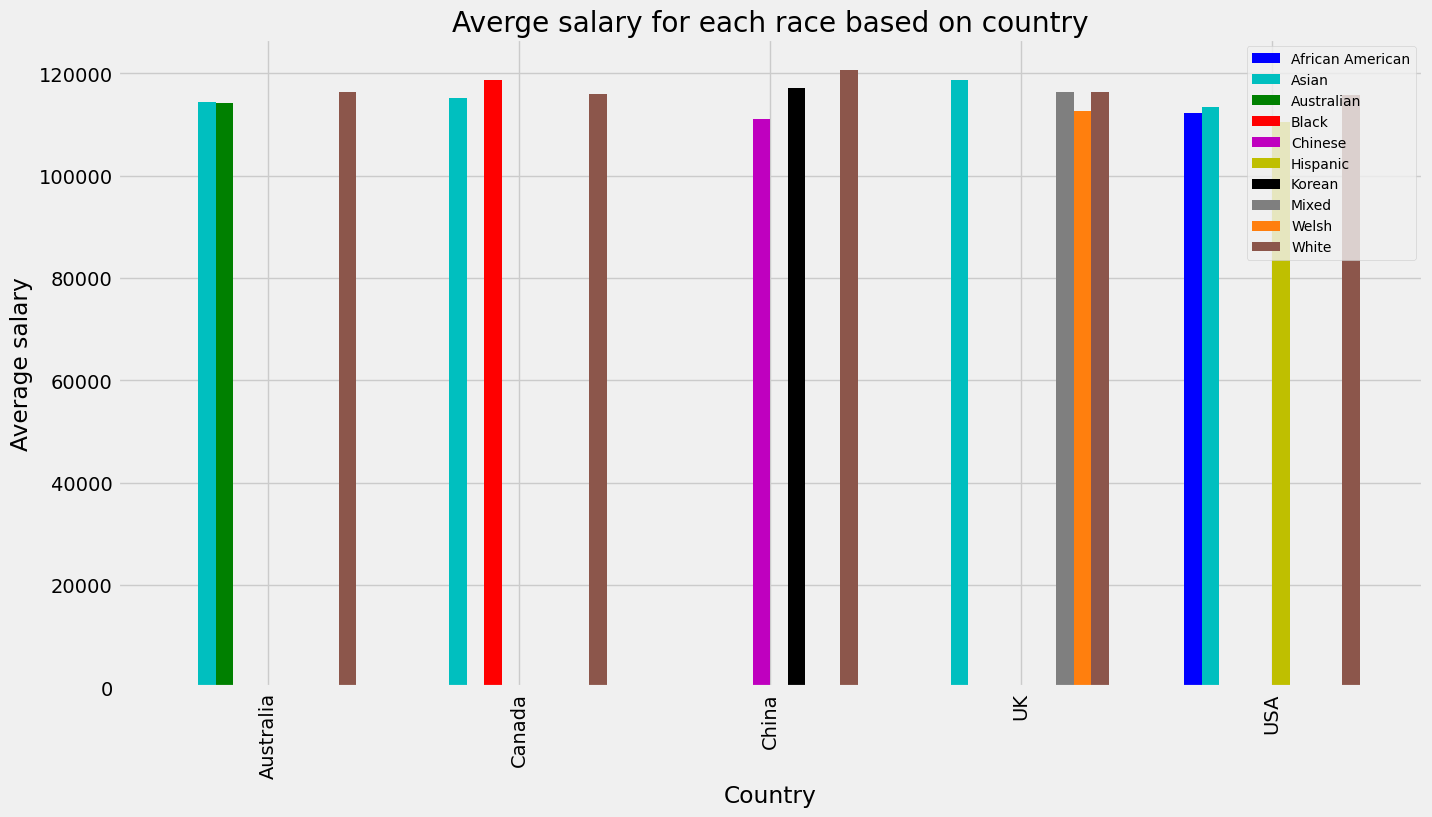

In [27]:
count_agg.pivot(index = "Country",columns = "Race", values = "mean").plot(kind = "bar",figsize=(15,8),width=0.7,color=["b","c","g","r","m","y","k","tab:gray","tab:orange","tab:brown"])
plt.title("Averge salary for each race based on country")
plt.ylabel("Average salary")
plt.legend(fontsize="10",loc="best")

In [28]:
count_tmp["Country","Race"].value_counts()

C:\Users\User\AppData\Local\Temp\ipykernel_18564\751807233.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  count_tmp["Country","Race"].value_counts()


Country    Race            
Australia  Asian               476
           Australian          452
           White               408
Canada     Asian               455
           Black               437
           White               433
China      Chinese             444
           Korean              457
           White               442
UK         Asian               336
           Mixed               334
           Welsh               333
           White               332
USA        African American    354
           Asian               336
           Hispanic            322
           White               347
dtype: int64

### Research Question 3 (What is the total and the averge salary for each race based on Gender?)

In [29]:
df.columns

Index(['Age', 'Gender', 'Education_Level', 'Job_Title', 'Years_of_Experience',
       'Salary', 'Country', 'Race'],
      dtype='object')

In [30]:
df["Gender"].value_counts()

Male      3671
Female    3013
Other       14
Name: Gender, dtype: int64

In [31]:
gen_tmp = df.groupby(["Gender","Race"])
gen_agg = gen_tmp["Salary"].agg(["mean","sum"]).reset_index()

In [32]:
gen_agg

,Gender,Race,mean,sum
0,Female,African American,103568.139073,15638789
1,Female,Asian,106380.923184,76168741
2,Female,Australian,108245.014354,22623208
3,Female,Black,108602.208333,20851624
4,Female,Chinese,106422.709184,20858851
5,Female,Hispanic,104509.158273,14526773
6,Female,Korean,110948.144186,23853851
7,Female,Mixed,108091.310345,15673240
8,Female,Welsh,108379.775758,17882663
9,Female,White,109595.268927,96991813


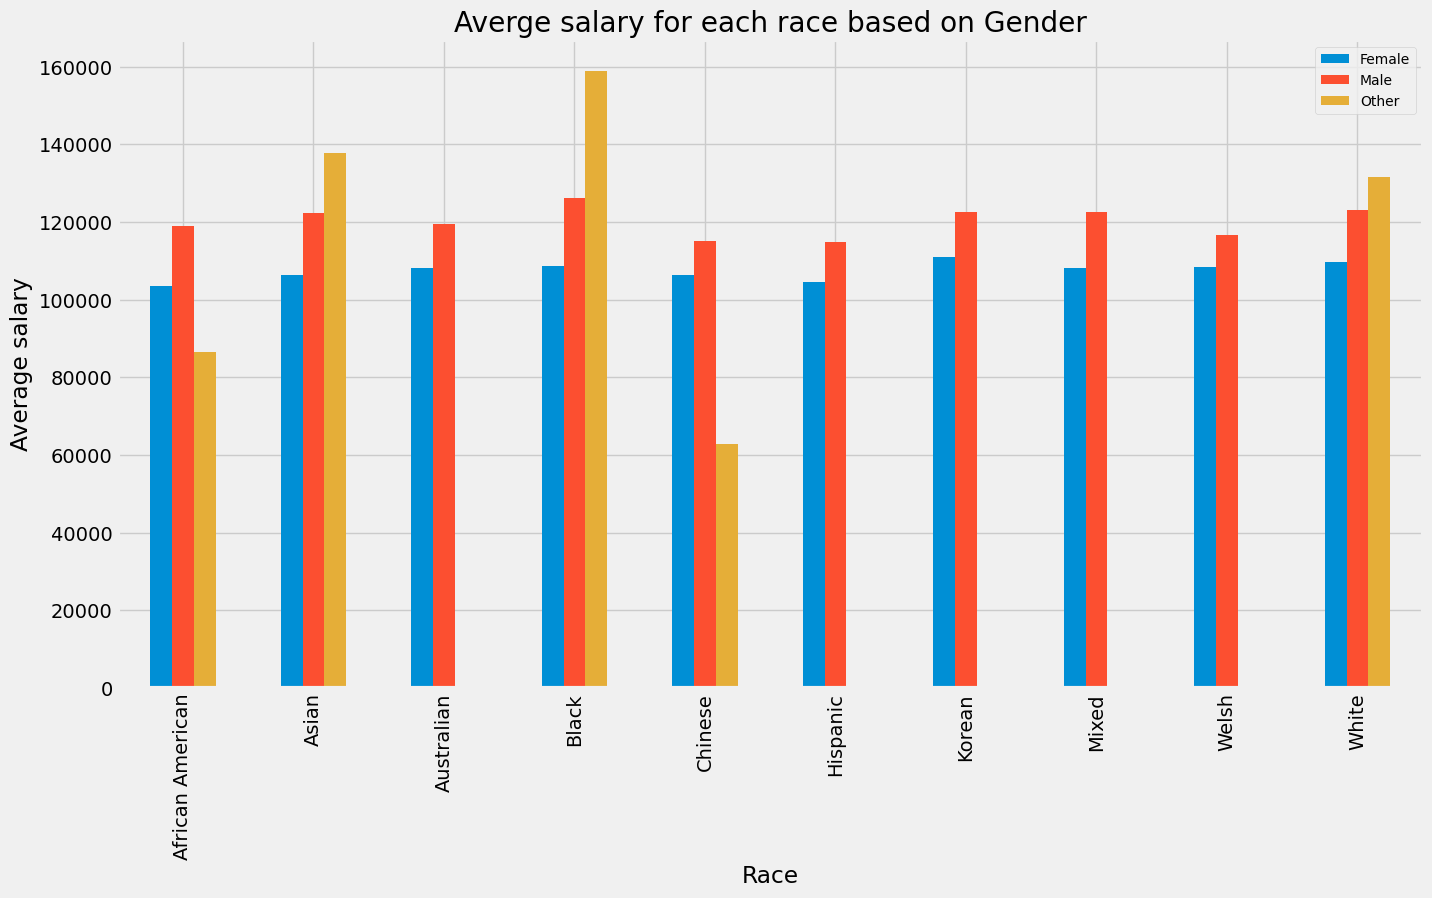

In [33]:
gen_agg.pivot(index = "Race",columns = "Gender", values = "mean").plot(kind = "bar",figsize=(15,8))
plt.title("Averge salary for each race based on Gender")
plt.ylabel("Average salary")
plt.legend(fontsize="10",loc="best")

In [34]:
gen_tmp["Gender","Race"].value_counts()

C:\Users\User\AppData\Local\Temp\ipykernel_18564\3817995145.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gen_tmp["Gender","Race"].value_counts()


Gender  Race            
Female  African American     151
        Asian                716
        Australian           209
        Black                192
        Chinese              196
        Hispanic             139
        Korean               215
        Mixed                145
        Welsh                165
        White                885
Male    African American     201
        Asian                883
        Australian           243
        Black                243
        Chinese              247
        Hispanic             183
        Korean               242
        Mixed                189
        Welsh                168
        White               1072
Other   African American       2
        Asian                  4
        Black                  2
        Chinese                1
        White                  5
dtype: int64

### Research Question 4 (What is the total and the averge salary for each race based on Education Level?)

In [35]:
df.columns

Index(['Age', 'Gender', 'Education_Level', 'Job_Title', 'Years_of_Experience',
       'Salary', 'Country', 'Race'],
      dtype='object')

In [36]:
df["Education_Level"].value_counts()

Bachelor's Degree    2265
Master's Degree      1572
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: Education_Level, dtype: int64

In [37]:
df["Education_Level"].replace({"Bachelor's":"Bachelor's Degree"},inplace = True)

In [38]:
df["Education_Level"].replace({"Master's":"Master's Degree"},inplace = True)
df["Education_Level"].replace({"phD":"PhD"},inplace = True)

In [39]:
df["Education_Level"].value_counts()

Bachelor's Degree    3021
Master's Degree      1860
PhD                  1369
High School           448
Name: Education_Level, dtype: int64

In [40]:
edu_tmp = df.groupby(["Education_Level","Race"])
edu_agg = edu_tmp["Salary"].agg(["mean","sum"]).reset_index()

In [41]:
edu_agg

,Education_Level,Race,mean,sum
0,Bachelor's Degree,African American,91624.271605,14843132
1,Bachelor's Degree,Asian,95826.701351,70911759
2,Bachelor's Degree,Australian,95017.768473,19288607
3,Bachelor's Degree,Black,93177.400000,17703706
4,Bachelor's Degree,Chinese,93078.084071,21035647
5,Bachelor's Degree,Hispanic,91364.681818,14070161
6,Bachelor's Degree,Korean,98848.808824,20165157
7,Bachelor's Degree,Mixed,96100.862069,13934625
8,Bachelor's Degree,Welsh,90116.338028,12796520
9,Bachelor's Degree,White,96486.728655,82496153


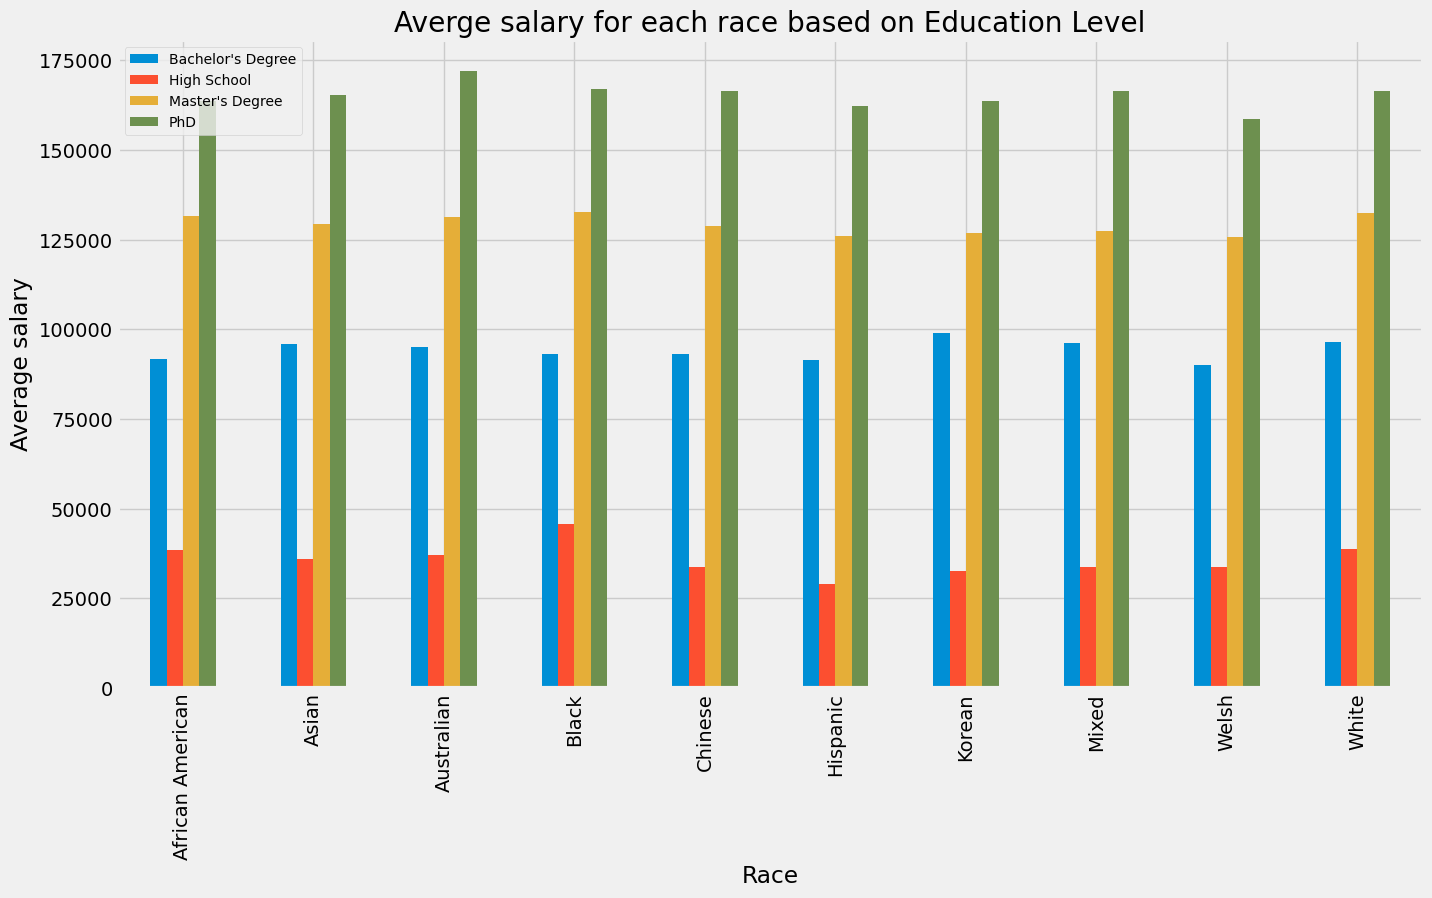

In [42]:
edu_agg.pivot(index = "Race",columns = "Education_Level", values = "mean").plot(kind = "bar",figsize=(15,8))
plt.title("Averge salary for each race based on Education Level")
plt.ylabel("Average salary")
plt.legend(fontsize="10",loc="best")

In [43]:
edu_tmp["Education_Level","Race"].value_counts()

C:\Users\User\AppData\Local\Temp\ipykernel_18564\2425727310.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  edu_tmp["Education_Level","Race"].value_counts()


Education_Level    Race            
Bachelor's Degree  African American    162
                   Asian               740
                   Australian          203
                   Black               190
                   Chinese             226
                   Hispanic            154
                   Korean              204
                   Mixed               145
                   Welsh               142
                   White               855
High School        African American     28
                   Asian                99
                   Australian           41
                   Black                23
                   Chinese              31
                   Hispanic             19
                   Korean               23
                   Mixed                24
                   Welsh                20
                   White               140
Master's Degree    African American     95
                   Asian               445
                  